# Python
Чем отличаются типы list и tuple? Какой из них можно использовать в качестве ключа в dict и добавлять в set? Почему? На какой структуре данных реализован dict в python? Чем отличается range от xrange в Python2.x? Что такое list comprehension? Как работают функции map и reduce в Python?


List - упорядоченная изменяемая коллекция объектов произвольного типа. Tuple - неизменяемая (неизменяемый список).
В качестве ключа можно использовать tuple (Only immutable elements can be used as dictionary keys, and hence only tuples and not lists can be used as keys). Ограничение на неизменяемость ключа для словаря вызвано необходимостью поиска в словаре - значение, соответствующее ключу находится по адресу, зависящему от хеша ключа. В случае со списком хеш будет меняться при изменении списка, что приведет к невозможности поиска в словаре. То же самое происходит при добавлении в сет (set is an unordered collection of distinct hashable objects). Для обеспечения уникальности входящего в сет элемента, от него считается хеш. Возникает опять та же проблема.

Dict реализован на хеш таблицах.

Range возвращает список, Xrange возврашает лениво вычисляемый объект, что быстрее и требует меньше памяти (элементы производятся но не сохраряются).

List comprehension - способ описания содержимого списка: [n for n in range(1, 10000) if n % 2 == 0]. Это создаст список, подходящий под поставленное условие.

Map применяет функцию к каждому из элементов списка и возвращает список, reduce производит операцию со всеми элементами списка (например, складывает все) и возыраш=щает полученное число.


Напишите рекурсивную функцию, возвращающую N-ное число Фи-боначчи. Проверьте работу для небольших N. Выясните, для какого N начинаются проблемы с глубиной рекурсии. Дополнительное задание для любознательных: попробуйте выяснить, можно ли в Python изменить допустимую глубину рекурсии


In [9]:
def Fibonacci_rec(a):
    if a <= 0:
        return  0
    else:
        if a == 1:
            return 1
        else:
            return Fibonacci_rec(a-1)+ Fibonacci_rec(a-2)
        
print (Fibonacci_rec(10))
#проблемы с x>42, слишком долго

55


In [13]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(2*sys.getrecursionlimit())
print(sys.getrecursionlimit())

1000
2000


Попробуйте измерить время работы предыдущей функции при разных N.

In [8]:
import time
start_time = time.clock()
print (Fibonacci_rec(10))
print (time.clock() - start_time, "seconds")

start_time = time.clock()
print (Fibonacci_rec(20))
print (time.clock() - start_time, "seconds")

start_time = time.clock()
print (Fibonacci_rec(30))
print (time.clock() - start_time, "seconds")

start_time = time.clock()
print (Fibonacci_rec(40))
print (time.clock() - start_time, "seconds")

start_time = time.clock()
print (Fibonacci_rec(42))
print (time.clock() - start_time, "seconds")

55
0.0005662903874963376 seconds
6765
0.009428916067008686 seconds
832040
0.8551775724856725 seconds
102334155
107.38977984706548 seconds
267914296
284.4248608724736 seconds


Напишите функцию, возвращающую (через запятую) модуль и аргумент комплексного числа по заданной мнимой и действительной части. Возможно, вам потребуется импортировать какие-то тригонометрические функции из модуля math. Приведите примеры работы. Каков тип возвращаемого вашей функцией значения?

In [34]:
import math
import numpy

def Mod_arg(x, y):
    """Function counting module and argument of a complex number.

    Args:
        x: Real part.
        y: Imaginary part.

    Returns:
        Tuple - module and argument of a complex number.
        
    Examples:
        Examples should be written in doctest format, and should illustrate how
        to use the function.

        >>> print(Mod_arg(3,4))
        (5.0, 0.9272952180016122)
        >>> print(Mod_arg(5,4))
        (6.4031242374328485, 0.6747409422235526)
        >>> print(Mod_arg(7,7))
        (9.899494936611665, 0.7853981633974483)

    """
    mod = math.sqrt(x**2 + y**2)
    if x > 0:
        arg = math.atan2(y, x)
    else:
        if y >= 0:
            arg = arg = math.atan2(y, x) + math.pi
        else:
            arg = arg = math.atan2(y, x) - math.pi
    return mod, arg
        

print (type(Mod_arg(3,4)))
print (Mod_arg(3,4))

<class 'tuple'>
(5.0, 0.9272952180016122)


Напишите docstrings к вашей последней функции. Изучите библиотеку doctest и попробуйте проверить, что написанные в docstrings примеры выполняются, без явного копирования кода оттуда (т.е. с помощью doctest).


In [38]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=3)

Реализуйте класс комплексных чисел с самым базовым функционалом. Цель не продемонстрировать умение спроектировать класс из каждого второго домашнего задания по любому языку программирования, а посмотреть на особенности реализации классов на питоне

In [47]:
class Complex(object):
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return Complex(self.real + other.real,
                       self.imag + other.imag)

    def __sub__(self, other):
        return Complex(self.real - other.real,
                       self.imag - other.imag)

    def __mul__(self, other):
        return Complex(self.real*other.real - self.imag*other.imag,
                       self.imag*other.real + self.real*other.imag)
    
    def __str__(self):
         return "Complex (%s, %s)" % (self.real, self.imag)
    
u = Complex(2,-1)
v = Complex(1)     # zero imaginary part
w = u + v
print (w)
print(u*v)
print (w + 4)

Complex (3, -1.0)
Complex (2.0, -1.0)
Complex (7, -1.0)


Изучите примеры работы с декораторами из официальной документации. Фактически, декоратор - это функция, которая принимает на вход другую функцию и возвращает её в модифицированном виде. Синтаксически предусмотрена возможность использовать декоратор, написав перед объявлением функции имя_декоратора. Попробуйте найти реализацию (или сделать сами) кэширующего декоратора и декоратора, вычисляющего время работы функции. Попробуйте применить эти декораторы в разной последовательности к функции, вычисляющей числа Фибоначчи, сравнить и объяснить результаты. Объясните также, как работают использованные вами декораторы.

In [57]:
def memorize(f):
    memo = {}
    def helper(*args, **kargs):
        k = tuple(args)
        if k not in memo:    
            memo[k] = f(*args, **kargs)
        return memo[k]
    return helper

@memorize
def Mem_fibonacci_rec(a):
    return Fibonacci_rec(a)

def benchmark(func):
    """
    Декоратор, выводящий время, которое заняло
    выполнение декорируемой функции.
    """
    import time
    def wrapper(*args, **kwargs):
        t = time.clock()
        res = func(*args, **kwargs)
        print (func.__name__, time.clock() - t)
        return res
    return wrapper

@memorize
@benchmark
def MB_fibonacci_rec(a):
    return Fibonacci_rec(a)

@benchmark
@memorize
def BM_fibonacci_rec(a):
    return Fibonacci_rec(a)

@benchmark
def B_fibonacci_rec(a):
    return Fibonacci_rec(a)

start_time = time.clock()
print (Mem_fibonacci_rec(40))
print (time.clock() - start_time, "seconds")
print (BM_fibonacci_rec(40))
print (MB_fibonacci_rec(40))
print (B_fibonacci_rec(40))
#https://habrahabr.ru/post/141411/
#https://habrahabr.ru/post/141501/

102334155
109.7581674408384 seconds
helper 105.81531084995368
102334155
MB_fibonacci_rec 109.40969117251188
102334155
B_fibonacci_rec 108.59186401303123
102334155


Выясните, чем отличается задание поля x через "self.x ="от объявления метода с декоратором property

При использовании проперти не нужно писать геттеры и сеттеры, поле можно сделать приватным

Напишите setter и getter для полей класса комплексного числа.

In [53]:
    def get_x(self):
        return self.__x

    def set_x(self, x):
        self.__x = x
        
    def get_y(self):
        return self.__y

    def set_y(self, y):
        self.__y = y

# Requests/urllib + BeautifulSoup
Скачайте html-код страницы с новостью с любого новостного сайта и, рас-
парсив его с помощью библиотеки Beautiful Soup или любой другой анало-
гичной, получите текст статьи (без html-тегов или вкраплений java script).


In [56]:
url = "http://lenta.ru/news/2015/11/11/aspirant/"

import requests
from bs4 import BeautifulSoup

text = requests.get(url).text
bs4_object = BeautifulSoup(text, "lxml")

print (bs4_object.find(itemprop="articleBody").text)


Аспирант МГУ жестоко избил самодельным копьем женщину-охранника студенческого общежития. Об этом сообщает РИА Новости со ссылкой на представителя столичного главка МВД.«Сотрудниками полиции был задержан 24-летний аспирант механико-математического факультета МГУ, который по неустановленным причинам нанес телесные повреждения 62-летней женщине-охраннику», — рассказал Андрей Галиакберов. По его словам, молодой человек использовал в качестве оружия металлическую палку с прикрепленным к ней ножом. Женщину доставили в больницу с черепно-мозговой травмой и переломом руки. Мотивы действий аспиранта выясняются.По словам очевидцев, молодой человек был невменяем и кричал, сообщает LifeNews. Женщина-охранник попыталась его усмирить, она же вызвала полицию.Нападавший задержан и направлен в психиатрическую больницу для оказания экстренной помощи. Возбуждено уголовное дело по статье «Умышленное причинение тяжкого вреда здоровью». Максимальное наказание по ней составляет десять лет лишения свободы.


# NumPy
Создайте numpy.ndarray размерностью 3x4x2 и продемонстрируйте разные способы обращения по индексам из документации NumPy.

In [66]:
import numpy as np
arr = np.ndarray(shape=(3,4,2), dtype=int, order='F')

print(arr)
print("***********************************")
print(arr[0,0,0])
print("***********************************")
print(arr[0,0])
print("***********************************")
print(arr[0])
print("***********************************")
print (arr[:,1])

[[[-334511080        404]
  [        64          0]
  [1647587683          0]
  [ 926365488          0]]

 [[         0          0]
  [ 943143225 1650668389]
  [ 859320886          0]
  [ 959799654  912339764]]

 [[ 912406883 1647851061]
  [ 828793699 -359661884]
  [1633825585  828453428]
  [ 825713763  895825460]]]
***********************************
-334511080
***********************************
[-334511080        404]
***********************************
[[-334511080        404]
 [        64          0]
 [1647587683          0]
 [ 926365488          0]]
***********************************
[[        64          0]
 [ 943143225 1650668389]
 [ 828793699 -359661884]]


Попробуйте сравнить по производительности numpy.array и list, выполняя какую-то стандартную операцию с каждым из типов много
раз.

In [82]:
arr = np.ndarray(shape=(80000), dtype=int, order='F')
start_time = time.clock()
for x in range(0, 300000):
    numpy.flipud(arr)
print (time.clock() - start_time, "seconds")

list = [x for x in range(80000)]
start_time = time.clock()
for x in range(0, 300000):
    list.reverse()
print (time.clock() - start_time, "seconds")

0.47266652740836435 seconds
15.308273876868043 seconds


Изучите numpy.linspace(), напишите свою реализацию аналогичной функции с помощью list comprehension, дающий тот же результат, только в виде list, а не numpy.ndarray. Сравните по производительности два варианта на достаточно больших массивах.

In [73]:
def listlinspace(*args, **kwargs):
    start_time = time.clock()
    num = kwargs.get('num', 50)
    endpoint = kwargs.get('endpoint', True)
    retstep = kwargs.get('retstep', False)
    start = args[0]
    end = args[1]
    if (len(args)>2):
        num = args[2]
    ret = [(end-start)/(num-1*endpoint)*i+start for i in range(num)]
    print (time.clock() - start_time, "seconds")
    if(retstep):
        return (ret, (end-start)/(num-1*endpoint))
    return ret


print(listlinspace(-3.0, 3.0, 7))
print(listlinspace(2.0, 3.0, num=5))
print(listlinspace(2.0, 4.0, num=5, endpoint=False, dtype=int))
print(listlinspace(2.0, 3.0, num=5, retstep=True))

def timelinspace(*args, **kwargs):
    start_time = time.clock()
    ret = np.linspace(*args, **kwargs)
    print (time.clock() - start_time, "seconds")
    return ret


print ("time initial:")
timelinspace(-300.0, 300.0, 7000000)

print ("time fot list comprehension:")
listlinspace(-300.0, 300.0, 7000000)

print("finished")

1.1470699973870069e-05 seconds
[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
9.055816917680204e-06 seconds
[2.0, 2.25, 2.5, 2.75, 3.0]
7.244652806548402e-06 seconds
[2.0, 2.4, 2.8, 3.2, 3.6]
6.6409320425009355e-06 seconds
([2.0, 2.25, 2.5, 2.75, 3.0], 0.25)
time initial:
0.08332558557958691 seconds
time fot list comprehension:
3.1138678357929166 seconds
finished


# Matplotlib
Что делает в Ipython Notebook команда %matplotlib inline?

Построенные графики встваляются прямо в блокнот

Используя numpy.linspace и генераторы, постройте в matplotlib график какой-нибудь элементарной функции. В минимальном варианте вам потребуются только pyplot из matplotlib и методы pyplot.plot() и pyplot.show(). Помните, что если импортируете модуль под каким-то именем (например, plt), то обращаться надо уже к нему, а не к pyplot.


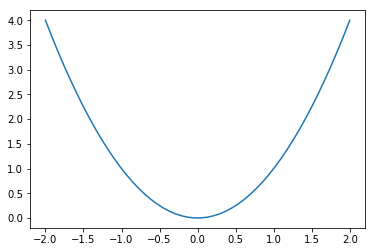

In [74]:
% matplotlib inline
from matplotlib import pylab as plt
plt.plot(np.linspace(-2, 2), [z ** 2 for z in  np.linspace(-2, 2)])
plt.show()

Постройте графики еще нескольких элементарных функций (на том же рисунке) и сделайте к ним подписи (легенду) с формулами (в подписях можно использовать LATEX, как обычно, в знаках $). Добавьте какие-нибудь подписи к осям координат и название графика. Сохраните изображение в файл одной строчкой на Python.

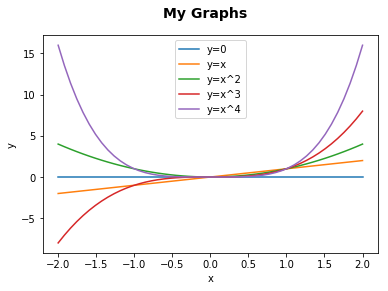

In [76]:
fig = plt.figure()
fig.suptitle('My Graphs', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(np.linspace(-2, 2), [0 for z in  np.linspace(-2, 2)], label='y=0')
ax.plot(np.linspace(-2, 2), [z  for z in  np.linspace(-2, 2)], label='y=x')
ax.plot(np.linspace(-2, 2), [z ** 2 for z in  np.linspace(-2, 2)], label='y=x^2')
ax.plot(np.linspace(-2, 2), [z ** 3 for z in  np.linspace(-2, 2)], label='y=x^3')
ax.plot(np.linspace(-2, 2), [z ** 4 for z in  np.linspace(-2, 2)], label='y=x^4')

# Now add the legend with some customizations.
legend = ax.legend()

plt.savefig('secondPlot.png')    
plt.show()

Изучите документацию matplotlib и попробуйте построить на одном изображении 4 системы координат, на верхних двух - квадратичную и кубическую параболы, на нижних - экспоненту и логарифм.

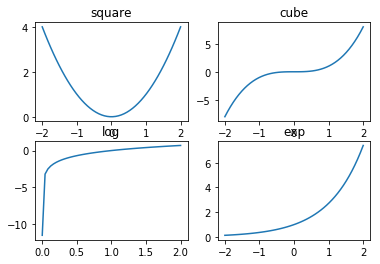

In [99]:
import math
x = np.linspace(-2, 2)

plt.figure(1)
plt.subplot(221)
plt.title('square')
plt.plot(x, [y**2 for y in  np.linspace(-2, 2)])

plt.subplot(222)
plt.title('cube')
plt.plot(x, [y**3 for y in  np.linspace(-2, 2)])

plt.subplot(223)
plt.title('log')
plt.plot(np.linspace(0.00001, 2), [math.log(y) for y in  np.linspace(0.00001, 2)])

plt.subplot(224)
plt.title('exp')
plt.plot(x, [math.exp(y) for y in  np.linspace(-2, 2)])
plt.show()

Изучите вопрос построения heatmap и изобразите его для функции f(x, y) = 3xy + x − 2y в области [0; 5]2


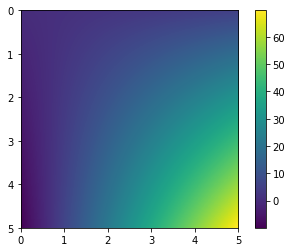

In [90]:
def f(x,y):
    return 3*x*y + x - 2*y

x = np.arange(0.0,5.0,0.01)
y = np.arange(0.0,5.0,0.01)

X,Y = np.meshgrid(x, y)
Z =f(X,Y)
plt.pcolormesh(X,Y,Z)
plt.imshow(Z, extent=[0,5,5,0])
plt.colorbar()
plt.show()

А теперь постройте трехмерный график той же функции в той же области.

# Всё вместе + SciPy
Сгенерируйте точки (y, x) (500 будет достаточно), удовлетворяющие зависимости y = x3 + 2x2 − 3x + 2, затем, с помощью numpy.random добавьте к координатам y нормальный шум. С помощью scipy восстановите исходную зависимость, считая известной степень полинома. Вам поможет curvefit или scipy.optimize.minimize, запущенный для суммы квадратичных отклонений. У восстановленной зависимости найдите экстремумы численно. Покажите на графике все вместе: исходные точки, восстановленную зависимость, найденные экстремумы.
Дополнительное задание: подберите коэффициенты многочлена, точно проходящего через точки (без добавления нормального шума), составив и решив с помощью scipy систему линейных уравнений.


# Pandas + Scikit-learn
Считайте выборку из примера про детектирование кожи на фотографии с семинара с помощью библиотеки pandas. Продемонстрируйте индексацию по строкам и столбцам, labeled-based и index-based. Добавьте в DataFrame столбцы, соответствующие попарным произведениям признаков и модулям попарных разностей. Запустите на исходных признаках и на модифицированных KNeighboursClassifier, LogisticRegression и Random Forest из sklearn и сравните качество работы каждого метода до и после преобразования признаков.


# Дополнительное задание: Bokeh
Выполните упражнения из tutorial: http://bokeh.pydata.org/en/latest/tutorial/index.html

Разобрать http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/01%20-%20plotting.ipynb